# Neuron

Todo: Focus training points on steep region of the curve, to imporive accuracy in those parts

## Ausgangslage

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
x_inputs = np.logspace(0.01, 1, 100)   # Value from, Value to, Amount of total numbers
y_train_inputs = np.log10(x_inputs)

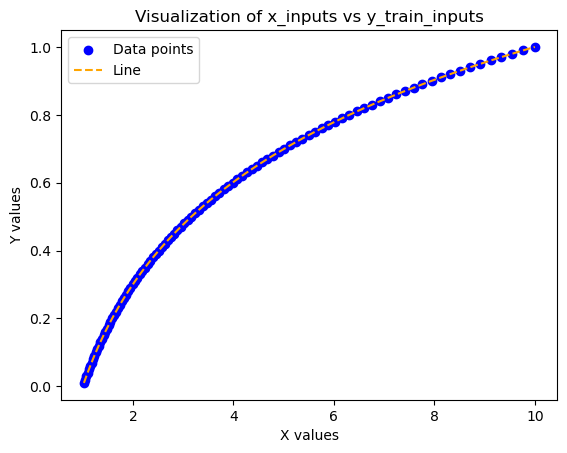

In [3]:
def visualize(x_inputs, y_train_inputs):
    # Scatter plot (points)
    plt.scatter(x_inputs, y_train_inputs, color="blue", label="Data points")

    # Line plot (connects points)
    plt.plot(x_inputs, y_train_inputs, color="orange", linestyle="--", label="Line")

    # Labels and title
    plt.xlabel("X values")
    plt.ylabel("Y values")
    plt.title("Visualization of x_inputs vs y_train_inputs")
    plt.legend()

    # Show the plot
    plt.show()

visualize(x_inputs, y_train_inputs)

## Bereitstellung des Modells

In [4]:
n_hidden = 5
weight_hidden = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
bias_hidden   = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
weight_out = [random.uniform(-0.5, 0.5) for _ in range(n_hidden)]
bias_out   = random.uniform(-0.5, 0.5)
epochs = 1000
print(f"Wir werden {epochs} Mal trainieren")
learning_rate = 0.1
print(f"wir trainieren mit einer learning rate von {learning_rate}")

Wir werden 1000 Mal trainieren
wir trainieren mit einer learning rate von 0.1


In [5]:
package = zip(x_inputs, y_train_inputs)
# print(list(package))

## Start Training

In [6]:
historical_loss = []

for epoch in range(epochs):
    
    if epoch % epochs/10 == 0:
        print("\n")
        print(f"Ich trainiere in Epoche {epoch+1}")
    package = zip(x_inputs, y_train_inputs)
    
    for x, y_true in package:

        hidden = [np.tanh(w*x + b) for w, b in zip(weight_hidden, bias_hidden)]
        y_pred = sum(w*h for w, h in zip(weight_out, hidden)) + bias_out

        diff = y_pred - y_true
        loss = diff ** 2

        historical_loss.append(loss)
        
        # output layer
        grad_w_out = [2.0 * diff * h for h in hidden]
        grad_b_out = 2.0 * diff
        
        # hidden layer
        # d_hidden = (1 - hidden**2) * weight2 * 2.0 * diff   # tanh' = 1 - tanh^2
        grad_w_hidden = []
        grad_b_hidden = []

        for i in range(n_hidden):
            d_hidden = (1 - hidden[i]**2) * weight_out[i] * 2.0 * diff
            grad_w_hidden.append(d_hidden * x)
            grad_b_hidden.append(d_hidden)


        # adjust hidden weight and bias:
        for i in range(n_hidden):
            weight_out[i] -= learning_rate * grad_w_out[i]
            bias_out -= learning_rate * grad_b_out

        # adjust output weight and bias:
        for i in range(n_hidden):
            weight_hidden[i] -= learning_rate * grad_w_hidden[i]
            bias_hidden[i]   -= learning_rate * grad_b_hidden[i]
        
        if epoch % epochs/10 == 0:
            print(f"Wir haben {x} und {y_true} als Trainings Daten")
            print(f"Ich sage y vorraus: {y_pred:.8f}")
            print(f"\033[31mIch lag um {diff:.8f} daneben\033[0m")
            for i in range(n_hidden):
                print(f"neues weight_hidden {i}: {weight_hidden[i]:.8f} und neues bias_hidden {i}: {bias_hidden[i]:.8f}")

    



Ich trainiere in Epoche 1
Wir haben 1.023292992280754 und 0.009999999999999986 als Trainings Daten
Ich sage y vorraus: 0.39149641
Ich lag um 0.38149641 daneben
neues weight_hidden 0: -0.12969369 und neues bias_hidden 0: -0.17064903
neues weight_hidden 1: -0.43767623 und neues bias_hidden 1: -0.48311239
neues weight_hidden 2: 0.05869521 und neues bias_hidden 2: 0.00158551
neues weight_hidden 3: 0.04962187 und neues bias_hidden 3: 0.30926930
neues weight_hidden 4: -0.38371093 und neues bias_hidden 4: 0.26589293
Wir haben 1.0471285480508996 und 0.02000000000000003 als Trainings Daten
Ich sage y vorraus: -0.06975839
Ich lag um -0.08975839 daneben
neues weight_hidden 0: -0.13007099 und neues bias_hidden 0: -0.17100935
neues weight_hidden 1: -0.44004497 und neues bias_hidden 1: -0.48537452
neues weight_hidden 2: 0.06100923 und neues bias_hidden 2: 0.00379538
neues weight_hidden 3: 0.05299671 und neues bias_hidden 3: 0.31249224
neues weight_hidden 4: -0.38855360 und neues bias_hidden 4: 0.2

# Usage

In [71]:
x_input = 0.5

hidden = [np.tanh(w*x_input + b) for w, b in zip(weight_hidden, bias_hidden)]
y_model_pred = sum(w*h for w,h in zip(weight_out, hidden)) + bias_out

print(f"x = {x_input}, y_pred = {y_model_pred:.8f}")

true = np.log10(x_input)
abs_err = abs(y_model_pred - true)
rel_err = abs_err / abs(true) * 100
print(f"Genaues Resultat Y = {true:.10f}, Voraussage Y = {y_model_pred:.8f}, Absoluter Fehler = {abs_err:.8f}, Relativer Fehler = {rel_err:.2f}%")

x = 0.5, y_pred = -0.20648187
Genaues Resultat Y = -0.3010299957, Voraussage Y = -0.20648187, Absoluter Fehler = 0.09454812, Relativer Fehler = 31.41%


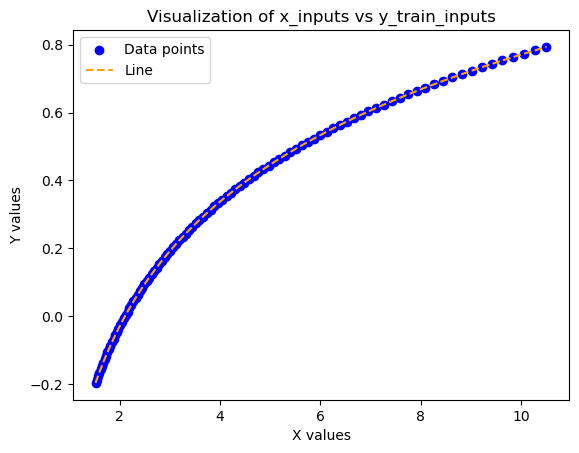

In [72]:
visualize(x_inputs + [x_input], y_train_inputs + [y_model_pred])

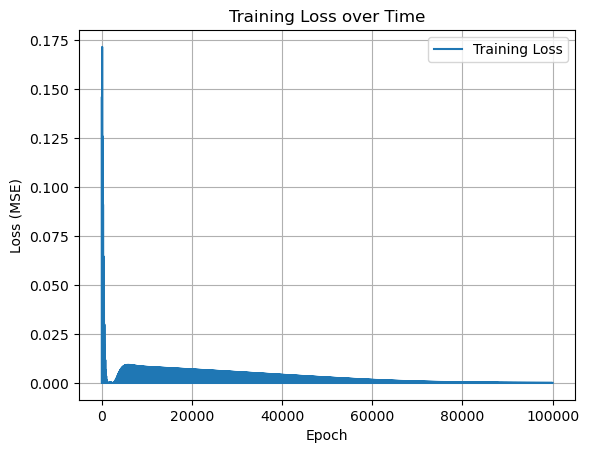

In [73]:
plt.plot(historical_loss, label="Training Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss over Time")
plt.legend()
plt.grid(True)
plt.show()

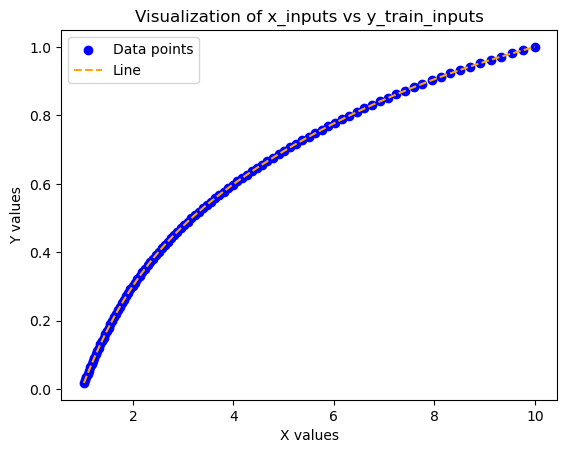

In [74]:
x_trials = np.logspace(0.01, 1, 100) 
y_trials = []

for x in x_trials:
    hidden = [np.tanh(w*x + b) for w, b in zip(weight_hidden, bias_hidden)]
    y = sum(w*h for w,h in zip(weight_out, hidden)) + bias_out
    y_trials.append(round(y, 8))

visualize(x_trials, y_trials)